In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/elizaveta/Documents/Master of Digital Humanities - KU Leuven/Data Mining/Project/activities.csv', na_values=['?'])

print('There are ' + str(data.shape[0]) + ' records')
print('There are ' + str(data.columns.size) + ' attributes:')

data_types = data.dtypes
print(data_types)

data.head(10)

There are 1000 records
There are 10 attributes:
date         object
activity     object
duration    float64
distance    float64
type         object
user          int64
age           int64
gender       object
weight      float64
location     object
dtype: object


,date,activity,duration,distance,type,user,age,gender,weight,location
0,01/01/2021,ride,1.71,44.31,workout,41269,34,f,63.2,NaN
1,01/01/2021,ride,1.29,36.14,workout,47027,20,m,73.9,"West Chester, US"
2,01/01/2021,run,46.84,8.55,workout,25075,23,m,75.7,"Busia, KE"
3,01/01/2021,run,47.99,6.92,workout,71720,42,m,78.7,"Busia, KE"
4,01/01/2021,run,45.09,5.13,workout,16994,19,f,64.6,"West Des Moines, US"
5,01/01/2021,run,49.83,8.82,workout,25075,23,m,75.7,"Busia, KE"
6,01/01/2021,ride,1.34,38.49,workout,35810,21,m,71.8,NaN
7,01/01/2021,run,58.45,11.18,workout,99227,40,f,52.8,NaN
8,01/01/2021,run,49.30,6.22,workout,65102,29,f,61.8,NaN
9,01/01/2021,run,58.65,10.69,workout,30984,33,m,76.9,"Busia, KE"


### 1. Demographics

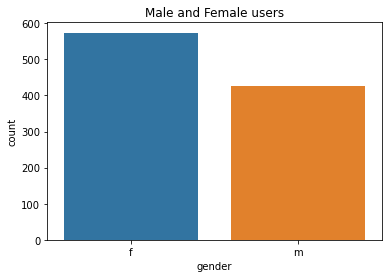

In [3]:
f = sns.countplot(x='gender', data=data)
f.set_title('Male and Female users');

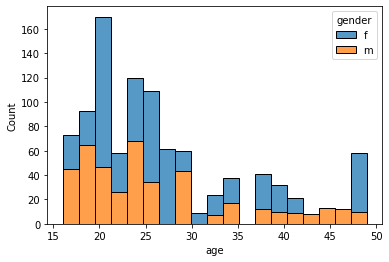

In [4]:
sns.histplot(data=data, x='age', hue='gender', multiple="stack");

### 2. Distance: run or ride

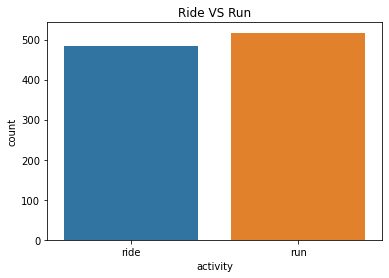

In [5]:
f = sns.countplot(x='activity', data=data)
f.set_title('Ride VS Run');

Text(0, 0.5, 'distance (km)')

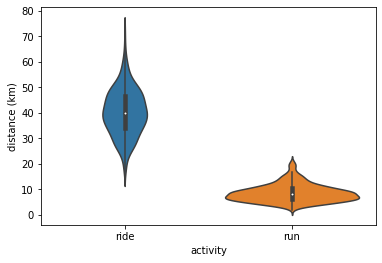

In [6]:
ax = sns.violinplot(x='activity', y='distance', data=data);
ax.set_ylabel("distance (km)")

### 3. Duration

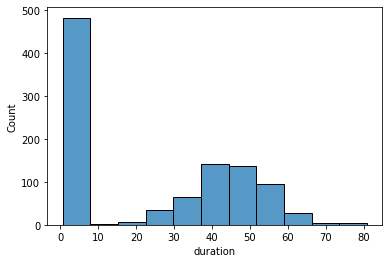

In [7]:
sns.histplot(data['duration']);

In [8]:
data.loc[data['activity'] == 'ride']

,date,activity,duration,distance,type,user,age,gender,weight,location
0,01/01/2021,ride,1.71,44.31,workout,41269,34,f,63.2,NaN
1,01/01/2021,ride,1.29,36.14,workout,47027,20,m,73.9,"West Chester, US"
6,01/01/2021,ride,1.34,38.49,workout,35810,21,m,71.8,NaN
13,01/01/2021,ride,1.02,27.78,workout,4307,18,m,62.4,"Zeist, NL"
15,02/01/2021,ride,1.44,37.64,workout,81958,23,f,63.7,"Schiebroek, NL"
...,...,...,...,...,...,...,...,...,...,...
987,29/02/2021,ride,1.25,32.57,workout,64099,16,f,64.6,"Emmeloord, NL"
988,02/29/2021,ride,1.68,48.13,workout,66144,21,m,68.0,"Porterville, US"
989,29/02/2021,ride,1.03,27.47,workout,26865,25,f,72.2,"Barneveld, NL"
991,29/02/2021,ride,1.26,35.40,race,43223,48,f,60.7,"Beveren, BE"


Text(0.5, 0, 'duration (min)')

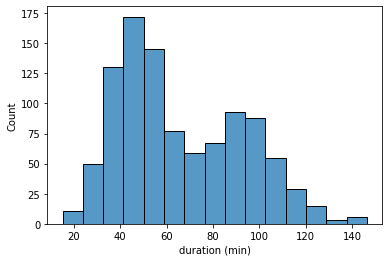

In [9]:
data.loc[(data['activity']=='ride'), 'duration'] = 60 * data.loc[(data['activity']=='ride'), 'duration']
ax = sns.histplot(data['duration']);
ax.set_xlabel("duration (min)")

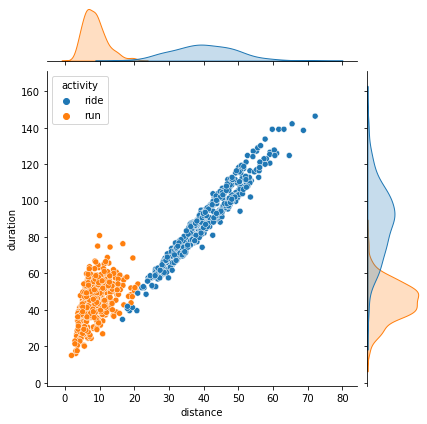

In [13]:
sns.jointplot(x='distance', y='duration', data=data, hue='activity', kind='scatter');

### 4. Date

In [14]:
data['date'] = data['date'].replace({'01/13/2021':'01/12/2021'})

In [15]:
data.loc[data['date'] == '01/15/2021']

,date,activity,duration,distance,type,user,age,gender,weight,location
312,01/15/2021,ride,99.00,47.76,workout,631,19,m,66.3,"Cypress Hills, US"
317,01/15/2021,ride,105.60,46.90,workout,12719,49,f,65.4,"Copperas Cove, US"
318,01/15/2021,run,46.18,8.37,workout,49255,20,f,57.0,"Port Huron, US"
320,01/15/2021,run,57.01,9.83,workout,40744,25,m,69.2,"Keene, US"


### 5. Location

In [16]:
data.loc[data['location'].isnull()].describe(include=['object'])

,date,activity,type,gender,location
count,270,270,270,270,0
unique,52,2,2,2,0
top,08/01/2021,ride,workout,f,NaN
freq,13,140,252,169,NaN


In [17]:
data[data.location.isnull()]

,date,activity,duration,distance,type,user,age,gender,weight,location
0,01/01/2021,ride,102.60,44.31,workout,41269,34,f,63.2,NaN
6,01/01/2021,ride,80.40,38.49,workout,35810,21,m,71.8,NaN
7,01/01/2021,run,58.45,11.18,workout,99227,40,f,52.8,NaN
8,01/01/2021,run,49.30,6.22,workout,65102,29,f,61.8,NaN
12,01/01/2021,run,56.30,10.53,race,26012,20,f,57.0,NaN
...,...,...,...,...,...,...,...,...,...,...
972,25/02/2021,ride,100.20,43.72,workout,69313,23,f,63.5,NaN
973,26/02/2021,ride,94.20,45.01,workout,59866,23,m,62.9,NaN
979,27/02/2021,ride,105.60,46.54,workout,71996,25,f,63.4,NaN
996,29/02/2021,run,49.70,5.75,workout,96551,49,f,64.0,NaN


In [18]:
data['location'].value_counts(dropna=False)

NaN                     270
Lodwar, KE              103
Busia, KE                73
Nyahururu, KE            61
Temse, BE                39
Barneveld, NL            36
Hoogezand, NL            32
Hardenberg, NL           29
Beveren, BE              24
Oldenzaal, NL            22
Tongelre, NL             21
Culemborg, NL            20
Gembloux, BE             19
Houthalen, BE            17
Front Royal, US          16
Schiebroek, NL           16
Zeist, NL                16
West Des Moines, US      15
Palm Desert, US          13
Saratoga Springs, US     13
West Chester, US         13
Wevelgem, BE             12
Cypress Hills, US        12
Lille, BE                11
Yonkers, US              10
Losser, NL               10
Emmeloord, NL             9
Keene, US                 9
Mouscron, BE              9
Port Huron, US            9
Claremont, US             8
Jackson, US               7
Porterville, US           7
Copperas Cove, US         7
Rixensart, BE             7
Iron River, US      

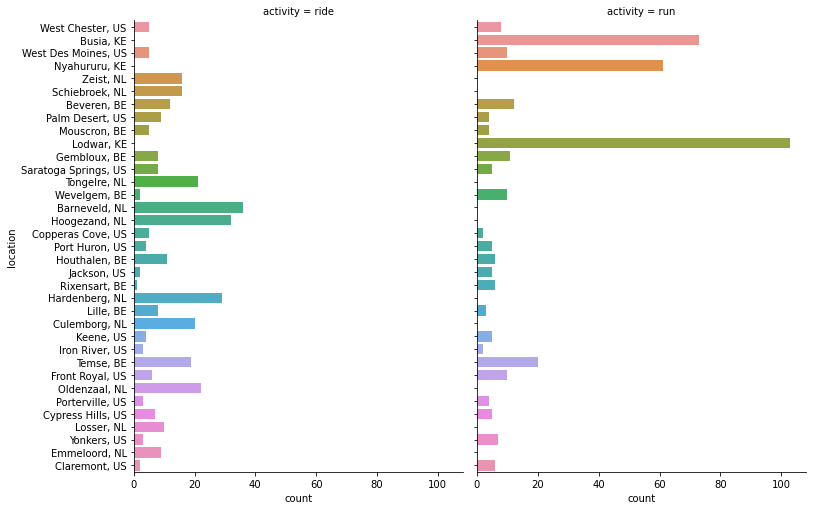

In [19]:
sns.catplot(y='location', col='activity', data=data, kind='count', height=7, aspect=.8);

### Other plots

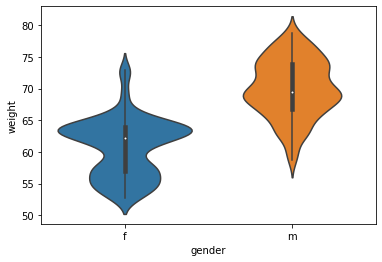

In [20]:
 sns.violinplot(x='gender', y='weight', data=data);

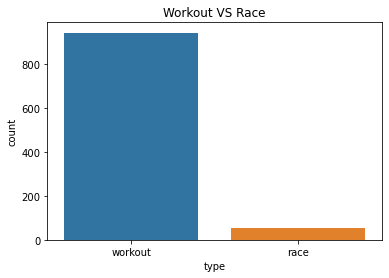

In [21]:
f = sns.countplot(x='type', data=data)
f.set_title('Workout VS Race');